In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
df = pd.read_csv("used_cars.csv")
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [4]:
# drop column name
df.drop(columns=['name'],inplace=True)
df.duplicated().sum()

np.int64(1221)

In [5]:
# check is there null value
df.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [6]:
df.shape

(8128, 12)

In [7]:
df.duplicated().sum()

np.int64(1221)

In [8]:
# drop duplicates 
df = df.drop_duplicates(keep='first')
df.shape

(6907, 12)

In [9]:
# drop null values in columns
df = df.dropna(how='all',axis=0)

df.shape

(6907, 12)

In [10]:
df.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
torque           209
seats            208
dtype: int64

In [11]:
df.nunique()

year              29
selling_price    677
km_driven        921
fuel               4
seller_type        3
transmission       2
owner              5
mileage          393
engine           121
max_power        322
torque           441
seats              9
dtype: int64

In [12]:
df.head(2)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0


In [13]:
import numpy as np
columns = ['mileage',"engine","max_power","torque"]
for col in columns:
    df[col] = df[col].str.replace(r'[^\d.]+', '', regex=True)
    df[col] = df[col].replace('', np.nan)
    df[col] = df[col].astype(float)
df.dtypes

year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque           float64
seats            float64
dtype: object

In [14]:
df.nunique()

year              29
selling_price    677
km_driven        921
fuel               4
seller_type        3
transmission       2
owner              5
mileage          381
engine           121
max_power        319
torque           400
seats              9
dtype: int64

In [15]:
columns = ['mileage', 'engine', 'max_power', 'torque']

# حذف ردیف‌هایی که در دو ستون از این چهار ستون مقدار خالی دارند
df = df.dropna(subset=columns, thresh=len(columns)-2)
df['torque'] = df['torque'].fillna(value=df['torque'].median())
df['max_power'] = df['max_power'].fillna(value=df['max_power'].median())
df.isnull().sum()


year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [16]:
# remove outeliter
def remove_outliers(data:pd.DataFrame,columns:dict):
    # df=pd.DataFrame(data)
    for keys,values in columns.items():
            data=df[(df[keys]>=values['min_x']) & (df[keys]<=values['max_x'])]
    return data
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,1.902000e+06,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,2.501500e+10,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,1.272700e+01,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,2.241750e+01,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,1.154500e+01,5.0


In [17]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# انتخاب ستون‌ها
columns = ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'fuel']

# تعداد ستون‌ها و ردیف‌ها
n_columns = 3  # تعداد ستون‌ها
n_rows = (len(columns) // n_columns) + (len(columns) % n_columns > 0)  # تعداد ردیف‌ها

# ایجاد شِیپ زیرمجموعه با استفاده از make_subplots
fig = make_subplots(
    rows=n_rows, cols=n_columns,
    subplot_titles=columns
)

# اضافه کردن هر نمودار boxplot به شِیپ
for i, col in enumerate(columns):
    row = i // n_columns + 1
    col_idx = i % n_columns + 1
    box_fig = go.Box(y=df[col], name=col)
    fig.add_trace(box_fig, row=row, col=col_idx)

# بهینه‌سازی ظاهر نمودارها
fig.update_layout(
    height=400 * n_rows,  # ارتفاع نمودارها
    width=1200,  # عرض نمودارها
    showlegend=False,  # مخفی کردن legend
    title_text="Boxplots of Columns",  # عنوان کلی نمودار
)

fig.show()


In [18]:
# remove noise rewo
df=remove_outliers(data=df,columns={'selling_price':{'min_x':10000, 'max_x':3000000}})
df=remove_outliers(data=df,columns={'engine':{'min_x':500, 'max_x':2500}})
df = remove_outliers(data=df,columns={'max_power':{'min_x':50,'max_x':250}})
df = remove_outliers(data=df,columns={'torque':{'min_x':50,'max_x':250}})
# remove noise rewo fuel value CNG
df = df[df['fuel'] != 'CNG']

In [20]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.754000,5.0
19,2016,680000,100000,Diesel,Individual,Manual,First Owner,22.54,1396.0,88.73,219.715003,5.0
27,2013,300000,70000,Diesel,Individual,Manual,First Owner,18.20,1248.0,73.80,172.517500,7.0
33,2018,730000,2388,Petrol,Individual,Manual,First Owner,18.60,1197.0,81.83,114.740000,5.0
62,2011,190000,110000,Petrol,Individual,Manual,Third Owner,20.36,1197.0,78.90,111.740000,5.0


In [21]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
# label encoder columns
columns=['fuel','seller_type','transmission','owner','seats']
lebel_encoders = {}
for col in columns:
    le =LabelEncoder()
    df[col] = le.fit_transform(df[col])
    lebel_encoders[col] = le
    
# min max scaler    
col_round = ["mileage",'engine','max_power','torque','km_driven','selling_price']
for col in col_round:
#     df[col] = df[col].apply(lambda x: round(x) + 1 if (x - int(x)) > 0.5 else round(x))
    mm=MinMaxScaler()
    df[col] = mm.fit_transform(df[[col]])
        
    
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
5,2017,0.339056,0.018648,2,1,1,0,0.791667,0.389624,0.288841,0.269739,0
19,2016,0.545064,0.041959,0,1,1,0,0.886006,0.592065,0.363272,0.998607,0
27,2013,0.218884,0.029244,0,1,1,0,0.715409,0.441506,0.201517,0.673952,1
33,2018,0.587983,0.000588,2,1,1,0,0.731132,0.389624,0.288516,0.276521,0
62,2011,0.124464,0.046197,2,1,1,3,0.800314,0.389624,0.256771,0.255886,0


In [22]:
df.corr()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
year,1.000000,0.745895,-0.248859,-0.196902,0.020041,-0.103128,-0.381722,0.266284,0.155260,0.269449,0.299668,0.024462
selling_price,0.745895,1.000000,-0.118385,-0.342805,-0.039284,-0.148124,-0.355554,0.205599,0.529567,0.627549,0.609619,0.003280
km_driven,-0.248859,-0.118385,1.000000,-0.101206,0.028114,0.041029,0.152442,-0.004510,0.059182,-0.012925,0.058833,0.062339
fuel,-0.196902,-0.342805,-0.101206,1.000000,0.055612,-0.129817,0.028280,-0.502540,-0.450758,-0.162451,-0.859014,-0.235442
seller_type,0.020041,-0.039284,0.028114,0.055612,1.000000,0.016235,0.113731,-0.053006,-0.082548,-0.097140,-0.088391,0.037977
transmission,-0.103128,-0.148124,0.041029,-0.129817,0.016235,1.000000,0.040770,0.149873,-0.102061,-0.217464,0.017105,0.029916
owner,-0.381722,-0.355554,0.152442,0.028280,0.113731,0.040770,1.000000,-0.029677,-0.101081,-0.154133,-0.104075,0.035230
mileage,0.266284,0.205599,-0.004510,-0.502540,-0.053006,0.149873,-0.029677,1.000000,-0.038122,-0.067057,0.418987,-0.085120
engine,0.155260,0.529567,0.059182,-0.450758,-0.082548,-0.102061,-0.101081,-0.038122,1.000000,0.875375,0.728497,0.061172
max_power,0.269449,0.627549,-0.012925,-0.162451,-0.097140,-0.217464,-0.154133,-0.067057,0.875375,1.000000,0.578154,-0.024437


In [23]:
df.dtypes

year               int64
selling_price    float64
km_driven        float64
fuel               int64
seller_type        int64
transmission       int64
owner              int64
mileage          float64
engine           float64
max_power        float64
torque           float64
seats              int64
dtype: object

# one variable Regression

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score,classification_report


In [25]:
X = df[['year']]
y = df['selling_price']

In [26]:
X_train , X_test ,y_train , y_test= train_test_split(X, y,test_size=0.3,random_state=42)


X_train.shape,X_test.shape,y_train.shape,y_test.shape

((599, 1), (257, 1), (599,), (257,))

In [27]:
model = LinearRegression()
pf = PolynomialFeatures(degree=2)

X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.transform(X_test)  
model.fit(X_train_poly, y_train)

score = model.score(X_test_poly, y_test) 


print(f"Model Score: {score}")

Model Score: 0.5493140652469231



mse = 0.014775538708181962
r2_score = 0.5493140652469231



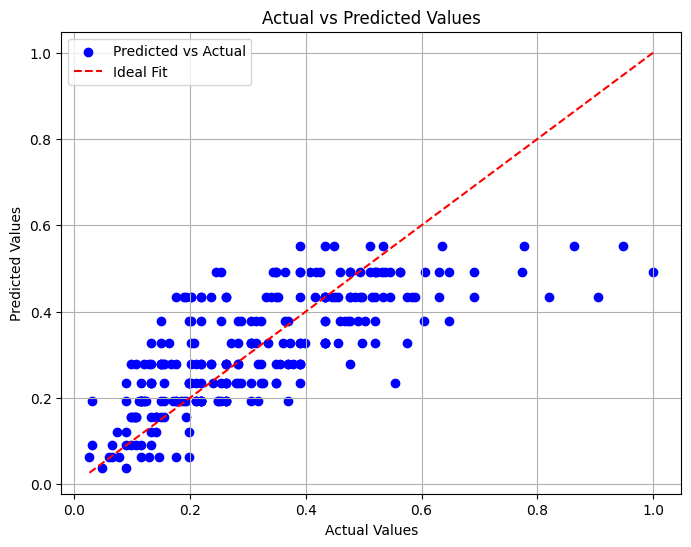

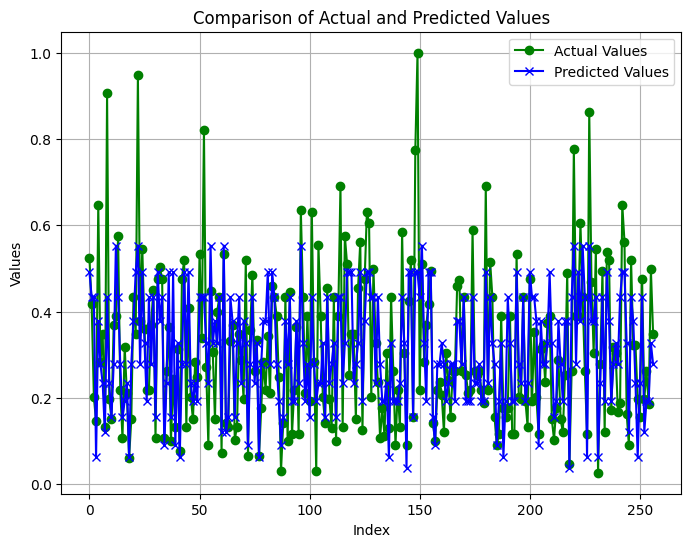

In [28]:
import matplotlib.pyplot as plt


# پیش‌بینی مدل
y_pred = model.predict(X_test_poly)

# محاسبه MSE و R² (برای بررسی مقادیر عملکرد)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'''
mse = {mse}
r2_score = {r2}
''')

# نمودار پراکندگی
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# نمودار خطی
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test)), y_test, marker='o', color='green', label='Actual Values')
plt.plot(range(len(y_pred)), y_pred, marker='x', color='blue', label='Predicted Values')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


# tow variable regression

In [29]:
X = df[['engine','year',]]
y = df['selling_price']
X_train , X_test ,y_train , y_test= train_test_split(X, y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((599, 2), (257, 2), (599,), (257,))

In [30]:
model = LinearRegression()
pf = PolynomialFeatures(degree=2)

X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.transform(X_test)  
model.fit(X_train_poly, y_train)

score = model.score(X_test_poly, y_test) 


print(f"Model Score: {score}")

Model Score: 0.7838565212364351



mse = 0.0070861681954683085
r2_score = 0.7838565212364351



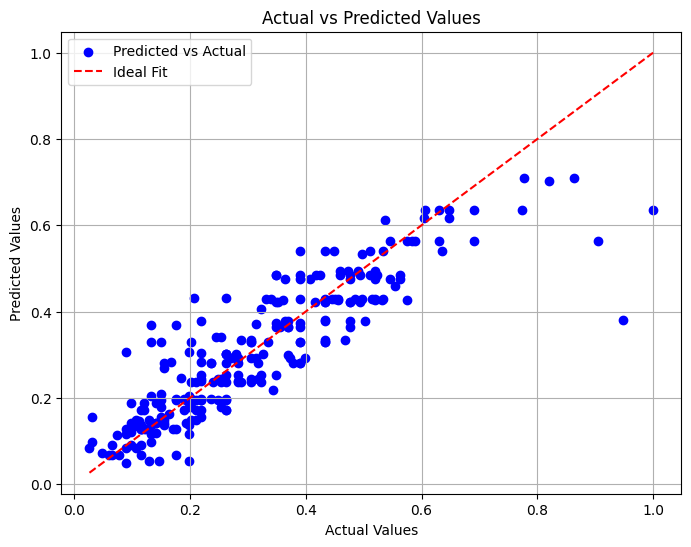

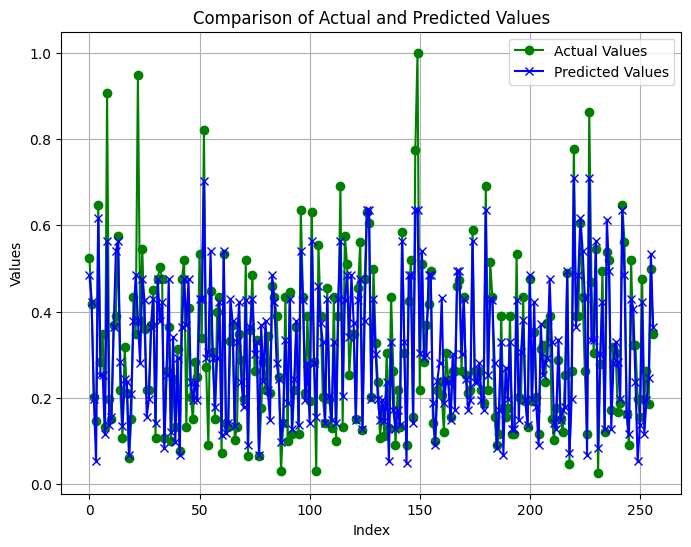

In [31]:
import matplotlib.pyplot as plt


# پیش‌بینی مدل
y_pred = model.predict(X_test_poly)

# محاسبه MSE و R² (برای بررسی مقادیر عملکرد)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'''
mse = {mse}
r2_score = {r2}
''')

# نمودار پراکندگی
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# نمودار خطی
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test)), y_test, marker='o', color='green', label='Actual Values')
plt.plot(range(len(y_pred)), y_pred, marker='x', color='blue', label='Predicted Values')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


# many variables regression

In [32]:
X = df[['year','engine','max_power','mileage','torque','seats']]
y = df['selling_price']
X_train , X_test ,y_train , y_test= train_test_split(X, y,test_size=0.3,random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((599, 6), (257, 6), (599,), (257,))

In [33]:
model = LinearRegression()
pf = PolynomialFeatures(degree=2)

X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.transform(X_test)  
model.fit(X_train_poly, y_train)

score = model.score(X_test_poly, y_test) 


print(f"Model Score: {score}")

Model Score: 0.8813879065824995



mse = 0.0038886449352118556
r2_score = 0.8813879065824995



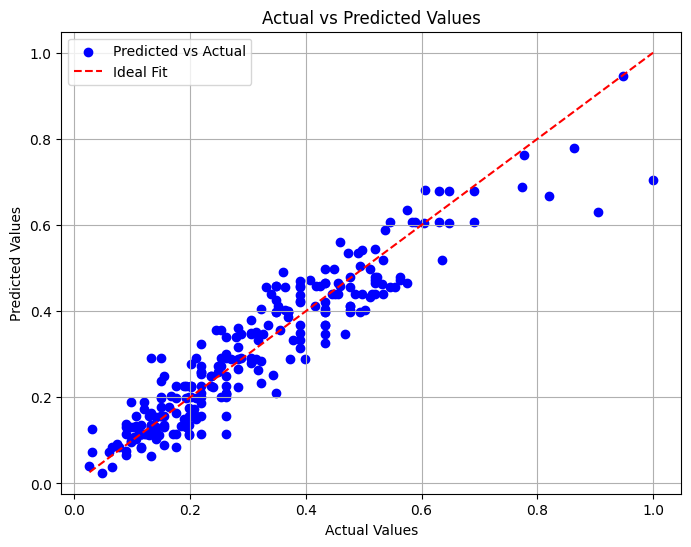

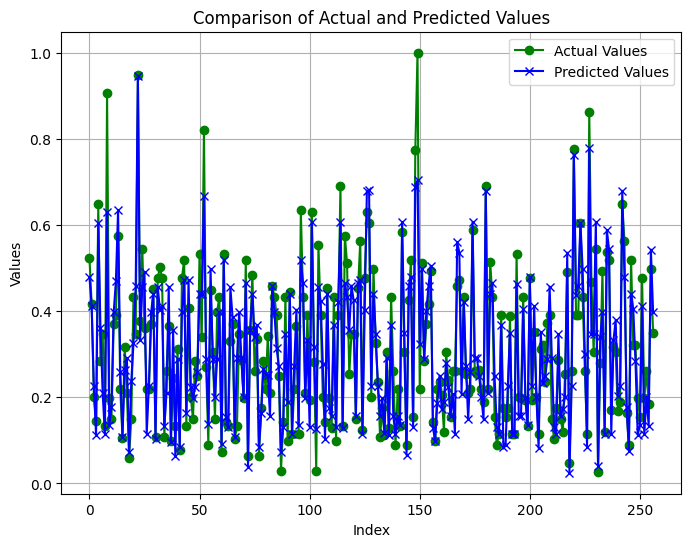

In [34]:
import matplotlib.pyplot as plt


# پیش‌بینی مدل
y_pred = model.predict(X_test_poly)

# محاسبه MSE و R² (برای بررسی مقادیر عملکرد)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'''
mse = {mse}
r2_score = {r2}
''')

# نمودار پراکندگی
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# نمودار خطی
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test)), y_test, marker='o', color='green', label='Actual Values')
plt.plot(range(len(y_pred)), y_pred, marker='x', color='blue', label='Predicted Values')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


# regression lasso

In [35]:
df.corr()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
year,1.000000,0.745895,-0.248859,-0.196902,0.020041,-0.103128,-0.381722,0.266284,0.155260,0.269449,0.299668,0.024462
selling_price,0.745895,1.000000,-0.118385,-0.342805,-0.039284,-0.148124,-0.355554,0.205599,0.529567,0.627549,0.609619,0.003280
km_driven,-0.248859,-0.118385,1.000000,-0.101206,0.028114,0.041029,0.152442,-0.004510,0.059182,-0.012925,0.058833,0.062339
fuel,-0.196902,-0.342805,-0.101206,1.000000,0.055612,-0.129817,0.028280,-0.502540,-0.450758,-0.162451,-0.859014,-0.235442
seller_type,0.020041,-0.039284,0.028114,0.055612,1.000000,0.016235,0.113731,-0.053006,-0.082548,-0.097140,-0.088391,0.037977
transmission,-0.103128,-0.148124,0.041029,-0.129817,0.016235,1.000000,0.040770,0.149873,-0.102061,-0.217464,0.017105,0.029916
owner,-0.381722,-0.355554,0.152442,0.028280,0.113731,0.040770,1.000000,-0.029677,-0.101081,-0.154133,-0.104075,0.035230
mileage,0.266284,0.205599,-0.004510,-0.502540,-0.053006,0.149873,-0.029677,1.000000,-0.038122,-0.067057,0.418987,-0.085120
engine,0.155260,0.529567,0.059182,-0.450758,-0.082548,-0.102061,-0.101081,-0.038122,1.000000,0.875375,0.728497,0.061172
max_power,0.269449,0.627549,-0.012925,-0.162451,-0.097140,-0.217464,-0.154133,-0.067057,0.875375,1.000000,0.578154,-0.024437


In [36]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

In [37]:
X = df[['year','engine','max_power','mileage','torque','seats']]
y = df['selling_price']
X_train , X_test ,y_train , y_test= train_test_split(X, y,test_size=0.3,random_state=42)

In [38]:
model = Lasso(max_iter=10000)
pf = PolynomialFeatures(degree=2)

X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.transform(X_test) 
params = {
    'alpha':[1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
   
}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring='r2',
    cv=5
)
grid_search.fit(X_train_poly,y_train)
scores = cross_val_score(grid_search, X_train_poly, y_train, cv=5, scoring='r2')
print(f'''
<---- Grid Search ---->
___________________________________________________________________________________________________
Best Parameters : {grid_search.best_params_}
Best R2 Score : {grid_search.best_score_}
R2 Scores: {scores}''')



<---- Grid Search ---->
___________________________________________________________________________________________________
Best Parameters : {'alpha': 0.0001}
Best R2 Score : 0.8138072102404441
R2 Scores: [0.79948415 0.81507084 0.79404604 0.81233766 0.84809737]



<---- Model Evaluation ---->
___________________________________________________________________________________________________
Best Parameters: {'alpha': 0.0001}




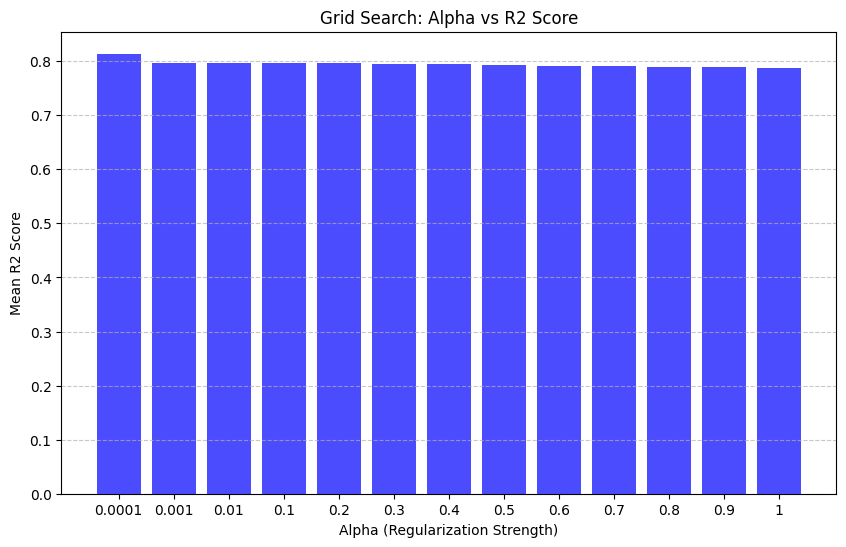

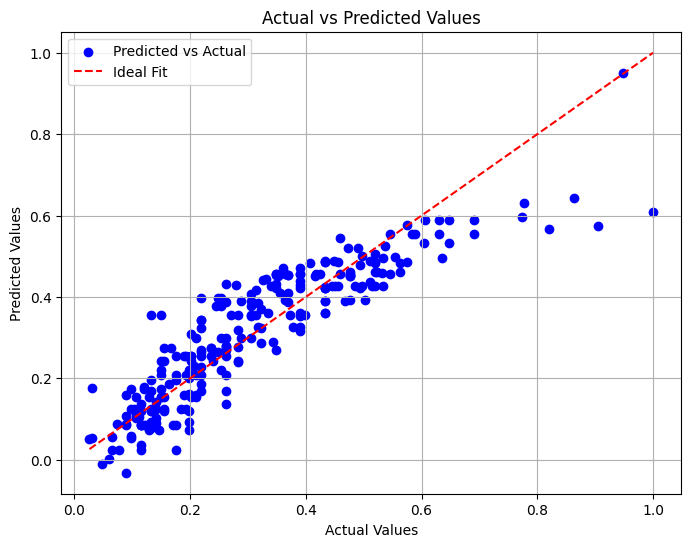

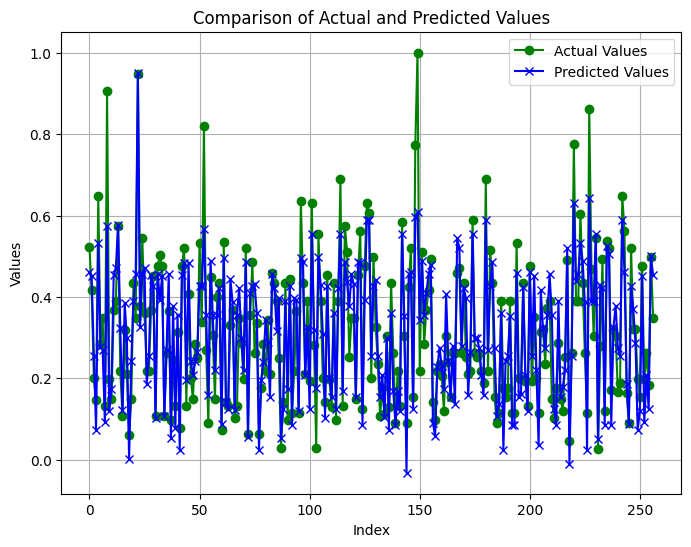

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score



# گرفتن بهترین مدل از Grid Search
best_model = grid_search.best_estimator_

# پیش‌بینی مقادیر روی داده‌های تست
y_pred = best_model.predict(X_test_poly)


print(f'''
<---- Model Evaluation ---->
___________________________________________________________________________________________________
Best Parameters: {grid_search.best_params_}

''')


# مقادیر alpha و امتیازهای R2
alphas = params['alpha']
r2_scores = grid_search.cv_results_['mean_test_score']
# رسم نمودار میله‌ای برای Grid Search
plt.figure(figsize=(10, 6))
plt.bar([str(a) for a in alphas], r2_scores, color='blue', alpha=0.7)
plt.title('Grid Search: Alpha vs R2 Score')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean R2 Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



# رسم نمودار پراکندگی (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# رسم نمودار خطی مقایسه‌ای
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test)), y_test, marker='o', color='green', label='Actual Values')
plt.plot(range(len(y_pred)), y_pred, marker='x', color='blue', label='Predicted Values')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


# ridge regression

In [40]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

In [41]:
X = df[['year','engine','max_power','mileage','torque','seats']]
y = df['selling_price']
X_train , X_test ,y_train , y_test= train_test_split(X, y,test_size=0.3,random_state=42)

In [42]:
model = Ridge(max_iter=10000)
pf = PolynomialFeatures(degree=2)
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.transform(X_test) 
params = {
    'alpha':[1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
   
}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring='r2',
    cv=5
)
grid_search.fit(X_train_poly,y_train)
scores = cross_val_score(grid_search, X_train_poly, y_train, cv=5, scoring='r2')
print(f'''
<---- Grid Search ---->
___________________________________________________________________________________________________
Best Parameters : {grid_search.best_params_}
Best R2 Score : {grid_search.best_score_}
R2 Scores: {scores}''')




<---- Grid Search ---->
___________________________________________________________________________________________________
Best Parameters : {'alpha': 0.001}
Best R2 Score : 0.8253832857184176
R2 Scores: [0.81051761 0.8229392  0.79916874 0.85132501 0.59507127]



<---- Model Evaluation ---->
___________________________________________________________________________________________________
Best Parameters: {'alpha': 0.001}




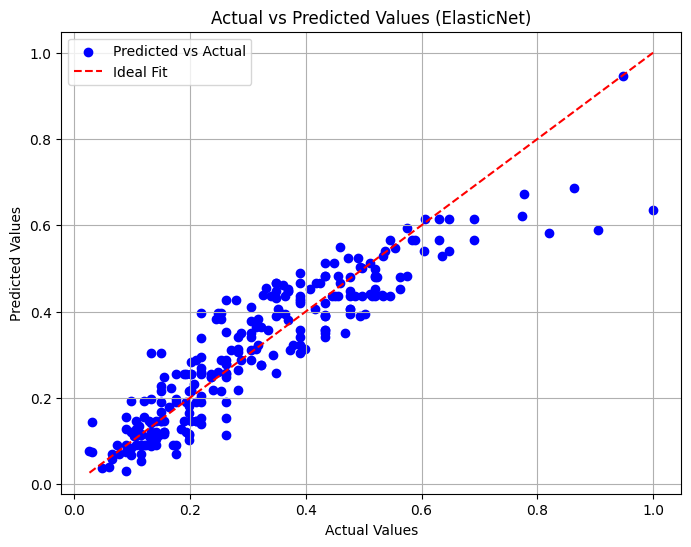

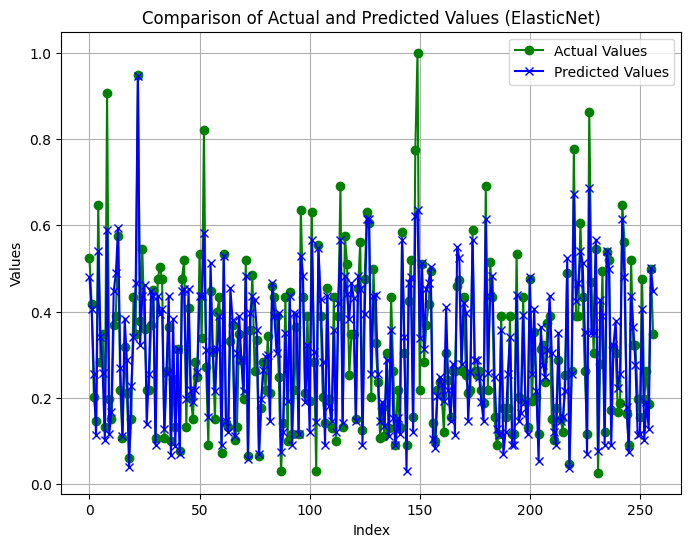

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# گرفتن بهترین مدل از Grid Search
best_model = grid_search.best_estimator_

# پیش‌بینی مقادیر روی داده‌های تست
y_pred = best_model.predict(X_test_poly)



print(f'''
<---- Model Evaluation ---->
___________________________________________________________________________________________________
Best Parameters: {grid_search.best_params_}

''')

# رسم نمودار پراکندگی (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Actual vs Predicted Values (ElasticNet)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# رسم نمودار خطی مقایسه‌ای
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test)), y_test, marker='o', color='green', label='Actual Values')
plt.plot(range(len(y_pred)), y_pred, marker='x', color='blue', label='Predicted Values')
plt.title('Comparison of Actual and Predicted Values (ElasticNet)')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


# elastic Registration

In [44]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures

In [45]:
X = df[['year','engine','max_power','mileage','torque']]
y = df['selling_price']
X_train , X_test ,y_train , y_test= train_test_split(X, y,test_size=0.3,random_state=42)

In [46]:
model = ElasticNet(max_iter=10000)
pf = PolynomialFeatures(degree=2)
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.transform(X_test) 
params = {
    'alpha':[1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring='r2',
    cv=5
)
grid_search.fit(X_train_poly,y_train)
# scores = cross_val_score(grid_search, X_train_poly, y_train, cv=5, scoring='r2')
print(f'''
<---- Grid Search ---->
___________________________________________________________________________________________________
Best Parameters : {grid_search.best_params_}
Best R2 Score : {grid_search.best_score_}
''')


<---- Grid Search ---->
___________________________________________________________________________________________________
Best Parameters : {'alpha': 0.0001, 'l1_ratio': 0.1}
Best R2 Score : 0.813008898842074




<---- Model Evaluation ---->
___________________________________________________________________________________________________
Best Parameters: {'alpha': 0.0001, 'l1_ratio': 0.1}



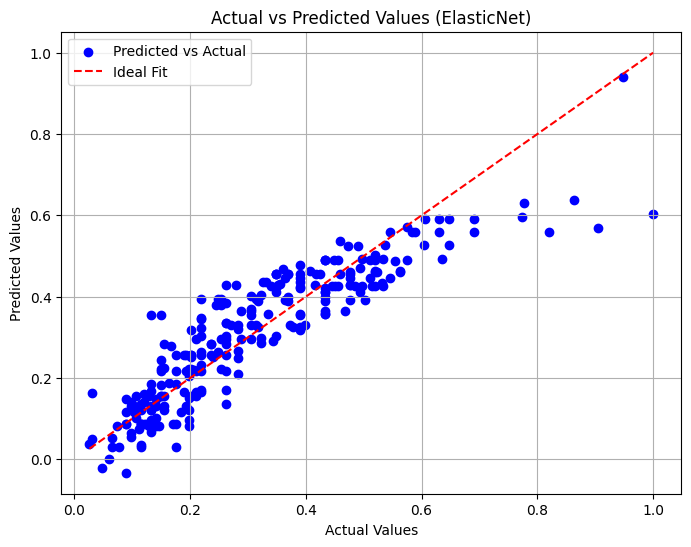

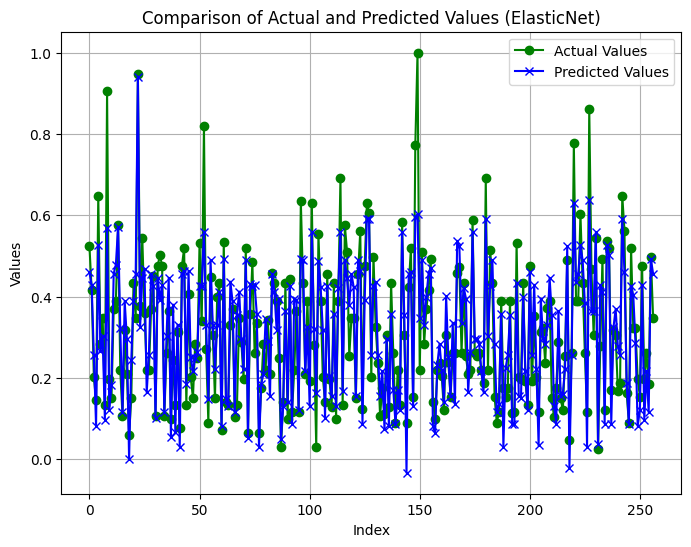

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# گرفتن بهترین مدل از Grid Search
best_model = grid_search.best_estimator_

# پیش‌بینی مقادیر روی داده‌های تست
y_pred = best_model.predict(X_test_poly)


print(f'''
<---- Model Evaluation ---->
___________________________________________________________________________________________________
Best Parameters: {grid_search.best_params_}
''')

# رسم نمودار پراکندگی (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Actual vs Predicted Values (ElasticNet)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# رسم نمودار خطی مقایسه‌ای
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test)), y_test, marker='o', color='green', label='Actual Values')
plt.plot(range(len(y_pred)), y_pred, marker='x', color='blue', label='Predicted Values')
plt.title('Comparison of Actual and Predicted Values (ElasticNet)')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()
